# Jaiver Barco
# Cod.202016908_44a
# Hierarchical Clustering

### Importamos las librerias 
librerias necesarias para ejecutar el codigo

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv('./Mall.csv')
dataset.head(100)

,ID_Cliente,Genero,Edad,Ingreso_Anual,Puntuacion_Gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


**Procedemos a buscar Datos o celdas con valores en 0**

In [10]:
dataset['Genero'] = dataset['Genero'].replace({'Male': 0, 'Female': 1})

In [11]:
print("Registros con cero en columna Genero",dataset['Genero'].isin([0]).sum() )
print("Registros con cero en columna Id_Cliente",dataset['ID_Cliente'].isin([0]).sum() )
print("Registros con cero en columna Edad",dataset['Edad'].isin([0]).sum() )
print("Registros con cero en columna Ingreso",dataset['Ingreso_Anual'].isin([0]).sum() )
print("Registros con cero en columna Puntuacion Gasto",dataset['Puntuacion_Gasto'].isin([0]).sum() )

Registros con cero en columna Genero 88
Registros con cero en columna Id_Cliente 0
Registros con cero en columna Edad 0
Registros con cero en columna Ingreso 0
Registros con cero en columna Puntuacion Gasto 0


# reemplazamos hombre y mujer en genero por numeros

In [12]:
dataset.head()

,ID_Cliente,Genero,Edad,Ingreso_Anual,Puntuacion_Gasto
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


## Procedemos a Graficar para encontrar Valores Atipicos

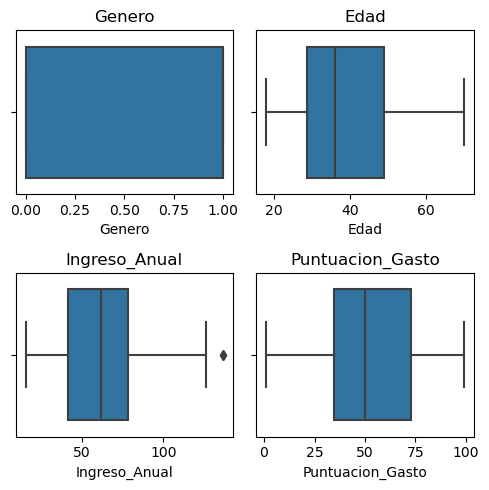

In [24]:
fig, axs = plt.subplots(2,2, figsize = (5,5))
titulos = ['Genero', 'Edad', 'Ingreso_Anual', 'Puntuacion_Gasto']
sns.boxplot(x=dataset['Genero'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=dataset['Edad'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=dataset['Ingreso_Anual'], ax=axs[1, 0]).set(title=titulos[2])
sns.boxplot(x=dataset['Puntuacion_Gasto'], ax=axs[1, 1]).set(title=titulos[3])

plt.tight_layout()
plt.show()

# en el ingreso anual tenemos datos atipicos los cuales pueden borrarse para tener un mejor analisis de la informacion

In [25]:
nivel_max=100
Total_atipicos=(dataset['Ingreso_Anual']>nivel_max).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:14


# se pensaba que eran solo pocos valores atipicos, sin embargo al tener 14 y tener una muestra tan baja, es mejor no borrarlos para no alterar los resultados


In [27]:

X= dataset[['Ingreso_Anual','Puntuacion_Gasto']].values


Text(0.5, 1.0, 'Dendrograma jerarquico para puntuacion de gasto')

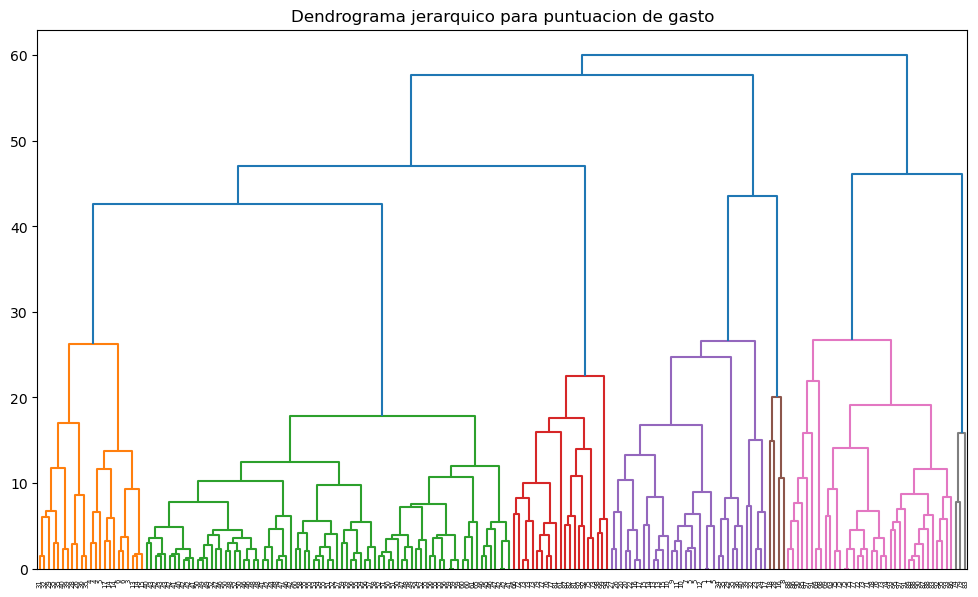

In [30]:
linked=linkage(X,'average')
plt.figure(figsize=(12,7))
dendrogram(linked, orientation='top',labels=dataset['Puntuacion_Gasto'].astype(str).values,distance_sort='descending',show_leaf_counts=True )
plt.title('Dendrograma jerarquico para puntuacion de gasto')

**numero de cluster basado en dendograma**

In [31]:
clustering=AgglomerativeClustering(n_clusters=5, linkage='average')
clustering.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [39]:
dataset['Cluster']=clustering.labels_
silhouette_score = metrics.silhouette_score(X, clustering.labels_)
print("Puntuación de silueta:", silhouette_score)
# Calcular la puntuación de Calinski-Harabasz
calinski_harabasz_score = metrics.calinski_harabasz_score(X, clustering.labels_)
print("Puntuación de Calinski-Harabasz:", calinski_harabasz_score)
davies_bouldin_score = metrics.davies_bouldin_score(X, clustering.labels_)
print("Índice de Davies-Bouldin:", davies_bouldin_score)


Puntuación de silueta: 0.4791911539647448
Puntuación de Calinski-Harabasz: 143.4210203217367
Índice de Davies-Bouldin: 0.6425127774689768


# Matrices de evaluacion

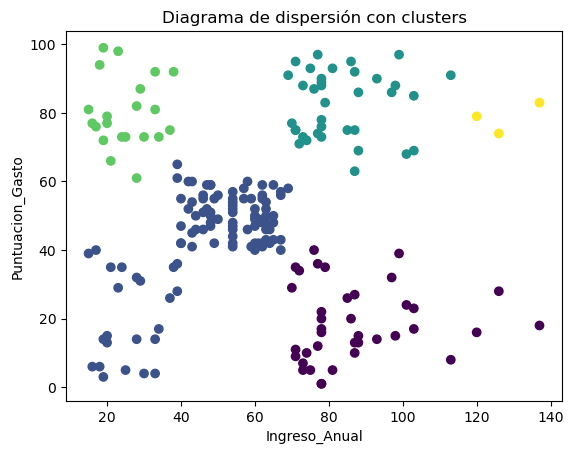

In [37]:
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='viridis')
plt.title('Diagrama de dispersión con clusters')
plt.xlabel('Ingreso_Anual')
plt.ylabel('Puntuacion_Gasto')
plt.show()

## Conclusion puntuacion de silueta
Esta métrica cuantifica cuán similar es un punto a su propio cluster (cohesión) en comparación con otros clusters (separación). La puntuación de silueta oscila entre -1 y 1, donde un valor alto indica que el punto está bien agrupado dentro de su cluster y está separado de otros clusters. Una puntuación cercana a 0 indica que el punto está cerca del límite de decisión entre dos clusters, y una puntuación negativa indica que el punto puede haber sido asignado al cluster incorrecto.
7

## Puntuación de Calinski-Harabasz: 
También conocida como el índice de varianza/borde, esta métrica mide la relación entre la dispersión dentro de los clusters y la dispersión entre los clusters. Cuanto mayor sea la puntuación de Calinski-Harabasz, más compactos y bien separados están los clusters. Esta métrica es más alta cuando los clusters son densos y están bien separados.

 una puntuación de silueta de aproximadamente 0.48 y una puntuación de Calinski-Harabasz de alrededor de 143 indican que el clustering ha producido resultados relativamente buenos.